# Classification of Airbnb Listing Prices in New York City
## Machine Learning Project
### Members: Asja Bašović (marked as A), Esma Kaderić (marked as B), Amina Hrustić (marked as C)

#### Sections 1-4 are primarily done by A and other contributions are highlighted in that specific cell

### Section 1
#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import GroupShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy import stats



#pls ovdje dodajite imports koje dole koristite


In [2]:
df = pd.read_csv('../data/raw/ML_df.csv')

### Section 2 
#### First look at the data PART 1

In [3]:
df.head()

,id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,39572,2025-01-03,169927,within a day,100%,NaN,f,t,t,Hell's Kitchen,...,4.86,4.93,4.83,4.98,5.00,4.98,4.86,f,2,0.25
1,39593,2025-01-03,110506,within a few hours,100%,60%,f,t,t,Sunnyside,...,4.93,4.89,4.89,4.96,4.96,4.79,4.93,f,1,0.20
2,39704,2025-01-03,170510,NaN,NaN,NaN,f,t,t,Bedford-Stuyvesant,...,4.71,4.86,4.82,4.89,4.92,4.38,4.72,f,2,1.93
3,42300,2025-01-03,184755,within a day,100%,100%,f,t,t,Lower East Side,...,4.80,4.72,4.69,4.85,4.87,4.57,4.62,f,1,0.40
4,42729,2025-01-03,11481,within a day,67%,33%,f,t,t,Carroll Gardens,...,4.66,4.78,4.81,4.71,4.73,4.58,4.64,f,4,1.26


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,443898.0,4.322008e+17,5.121233e+17,2539.00,21317156.00,50181296.00,9.151435e+17,1.521848e+18
host_id,443898.0,1.720431e+08,1.889859e+08,1678.00,17763535.00,86538929.00,3.052402e+08,7.214431e+08
accommodates,443898.0,2.752662e+00,1.898442e+00,1.00,2.00,2.00,4.000000e+00,1.600000e+01
bathrooms,267049.0,1.193848e+00,5.544215e-01,0.00,1.00,1.00,1.000000e+00,1.550000e+01
bedrooms,372494.0,1.382468e+00,9.365223e-01,0.00,1.00,1.00,2.000000e+00,1.600000e+01
beds,265841.0,1.637234e+00,1.203450e+00,0.00,1.00,1.00,2.000000e+00,4.200000e+01
minimum_nights,443898.0,2.900702e+01,3.215023e+01,1.00,30.00,30.00,3.000000e+01,1.250000e+03
maximum_nights,443898.0,5.911995e+04,1.116582e+07,1.00,140.00,365.00,1.125000e+03,2.147484e+09
availability_30,443898.0,9.996722e+00,1.258340e+01,0.00,0.00,0.00,2.600000e+01,3.000000e+01
availability_365,443898.0,1.595709e+02,1.464691e+02,0.00,0.00,148.00,3.120000e+02,3.650000e+02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443898 entries, 0 to 443897
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              443898 non-null  int64  
 1   last_scraped                    443898 non-null  object 
 2   host_id                         443898 non-null  int64  
 3   host_response_time              259303 non-null  object 
 4   host_response_rate              259303 non-null  object 
 5   host_acceptance_rate            265377 non-null  object 
 6   host_is_superhost               438729 non-null  object 
 7   host_has_profile_pic            441460 non-null  object 
 8   host_identity_verified          441460 non-null  object 
 9   neighbourhood_cleansed          443898 non-null  object 
 10  property_type                   443898 non-null  object 
 11  room_type                       443898 non-null  object 
 12  accommodates    

In [6]:
df.shape

(443898, 35)

df.columns

<Axes: >

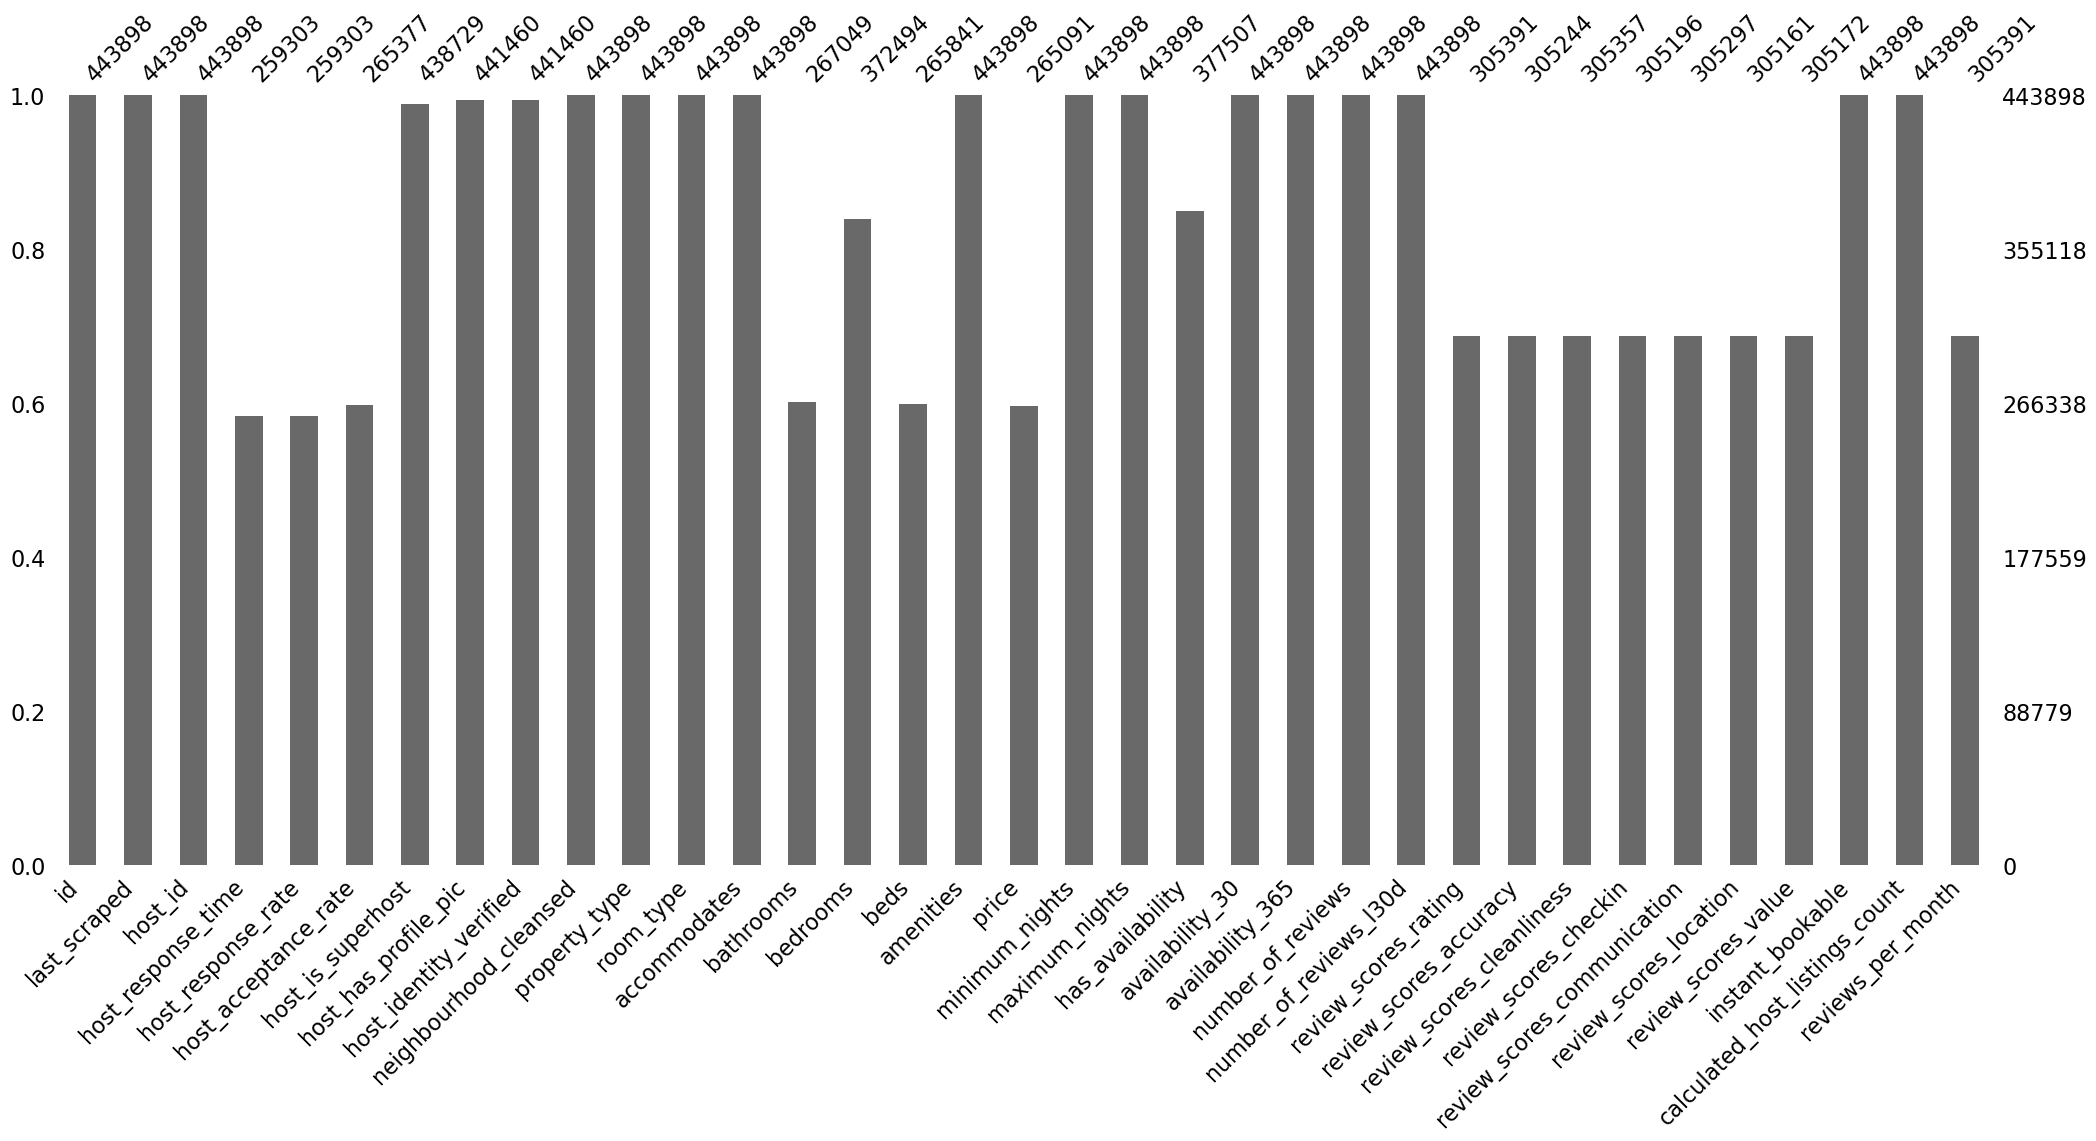

In [7]:
msno.bar(df)

<Axes: >

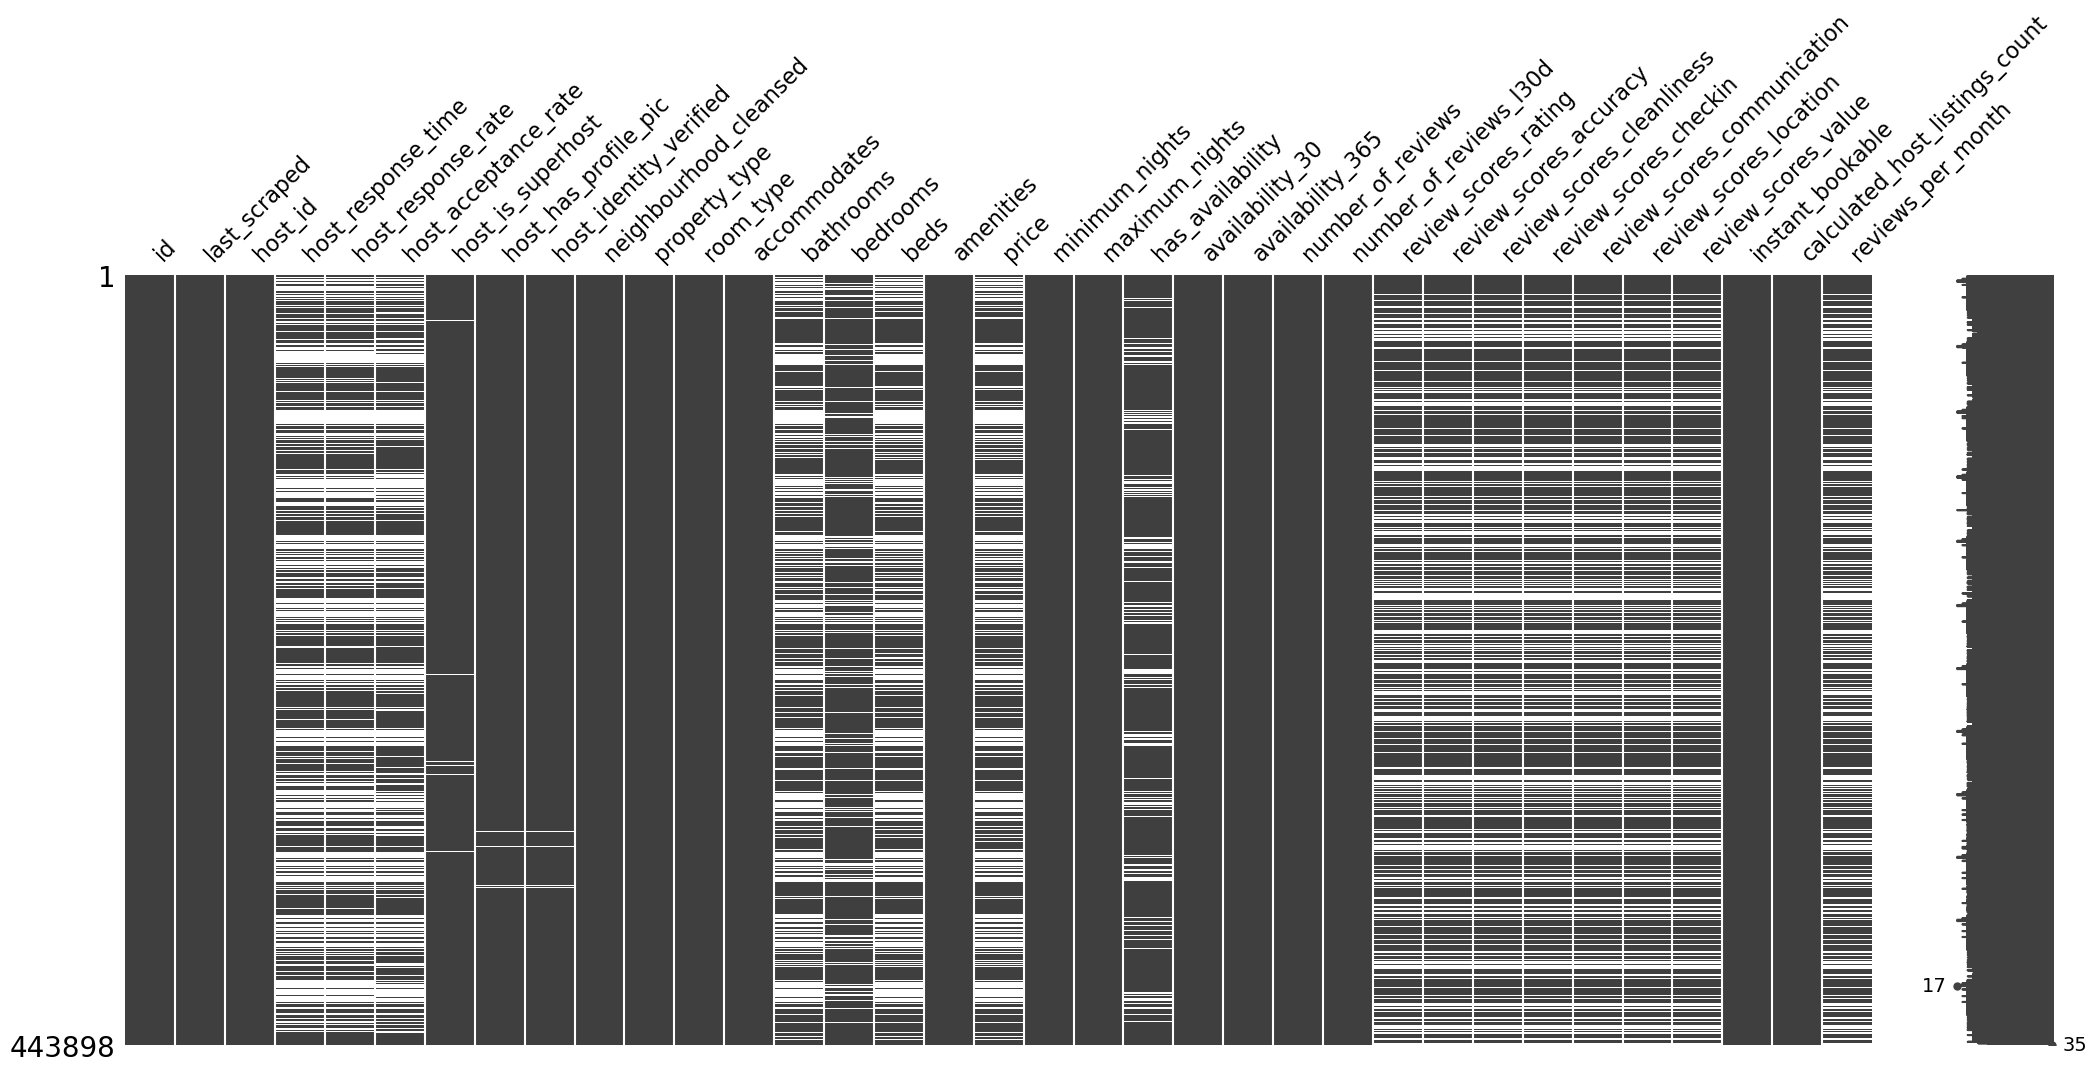

In [8]:
msno.matrix(df)

In [9]:
#Note: First look visualization was limited due to features not being in the correct format, e.g. host_response_rate is a string since it has the '%' sign¶

In [10]:
df2=df.select_dtypes(include=['float64', 'int']) # note: name is ambiguous

In [11]:
df2.columns # note: name is ambiguous

Index(['id', 'host_id', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_365', 'number_of_reviews', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

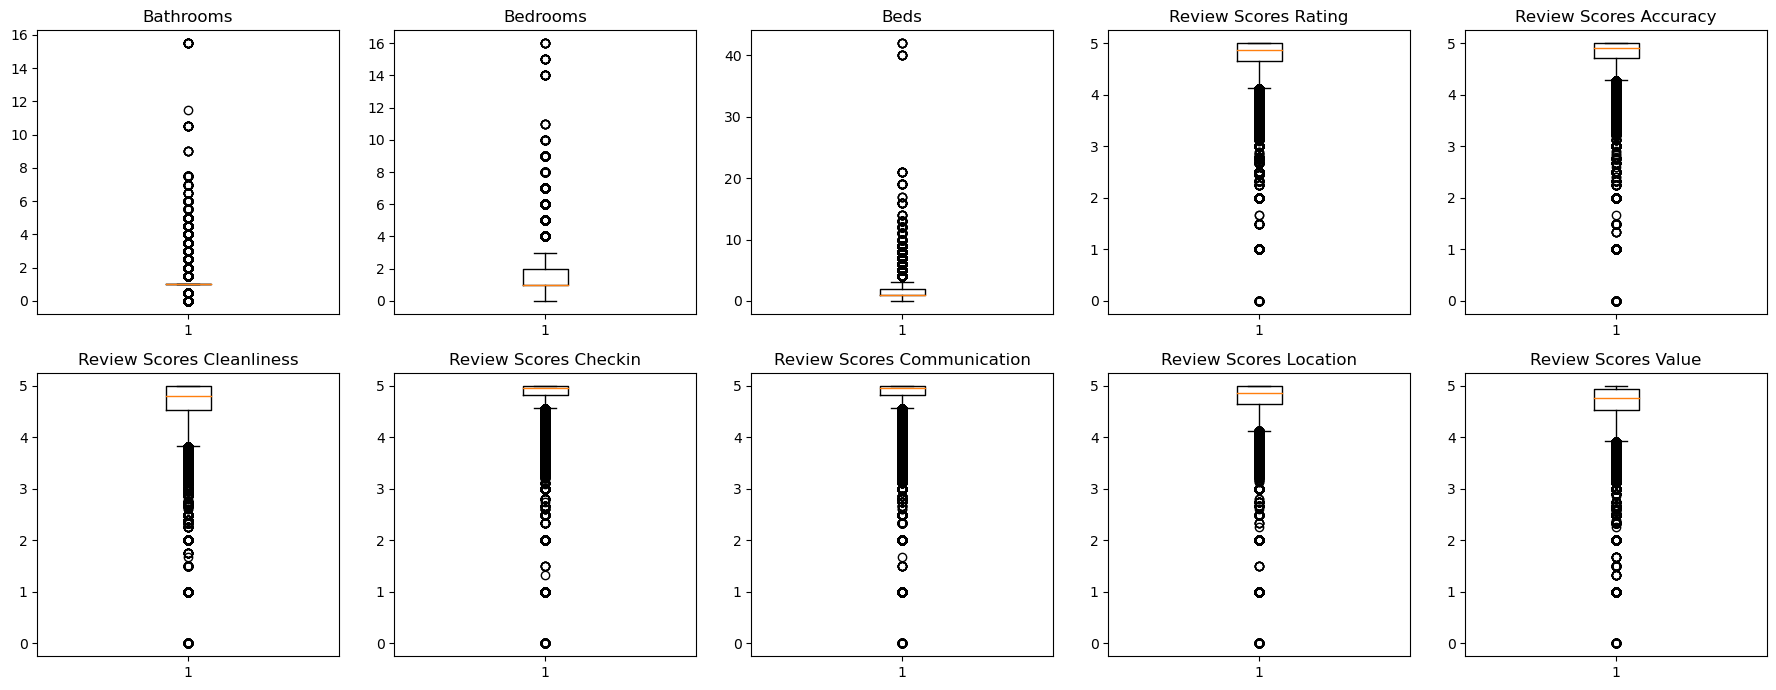

In [12]:
cols = [
    'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()



#some notes about above:
#Most listings are small (1 bathroom, 1 bedroom), but there are a few extremely large ones - means
# that we have outliers. Review scores are extremely positive for nearly everyone. The distributions are skewed,
# not normal.

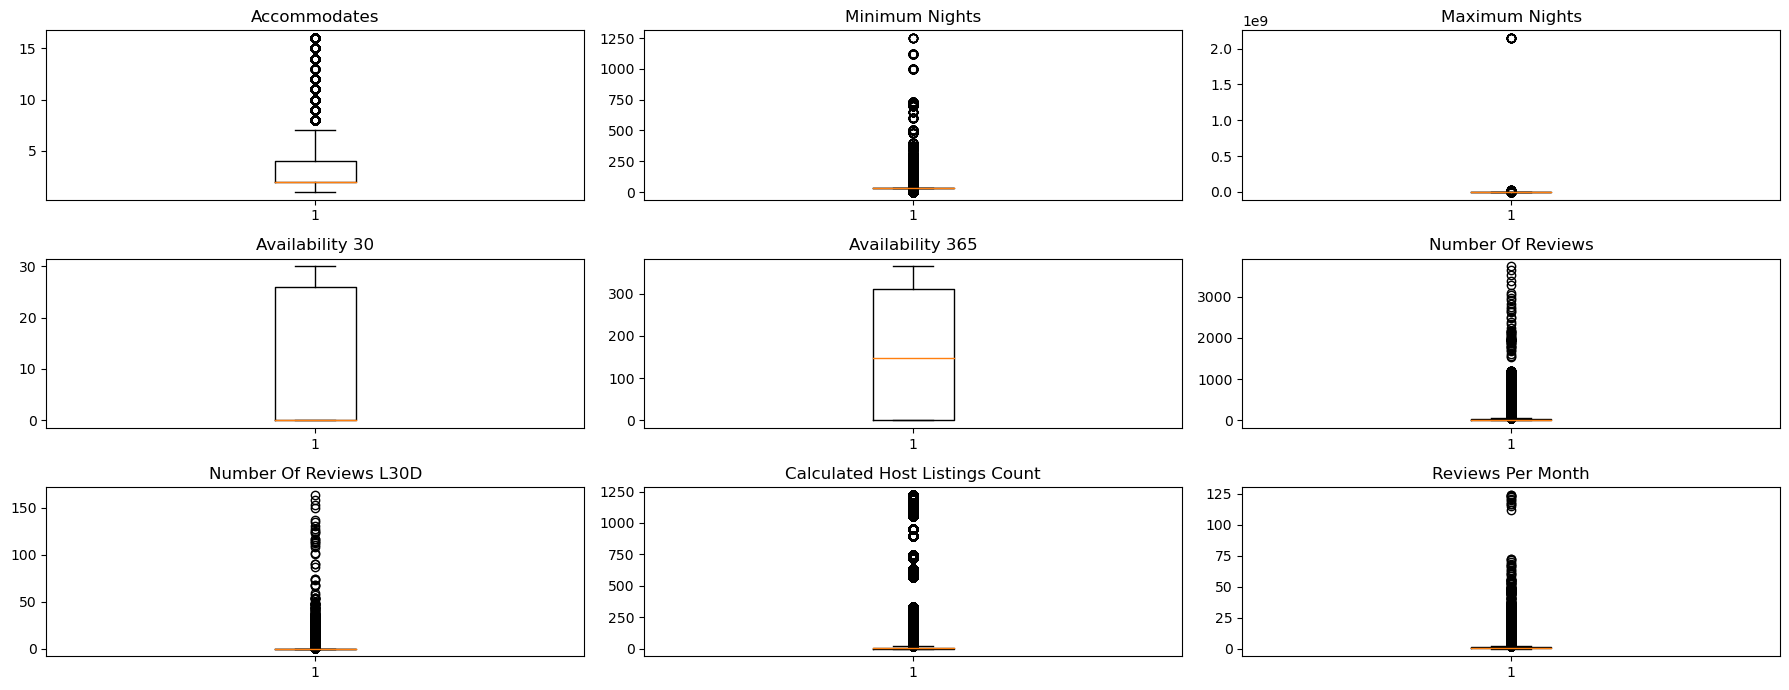

In [13]:
cols = [
   'accommodates', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_365', 'number_of_reviews',
       'number_of_reviews_l30d', 'calculated_host_listings_count', 'reviews_per_month'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 7))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


#TODO: ono sto moze neko ovdje da uradi posto moramo svi na svakom dijelu ucestovovat je da izabera npr 2 features
# i da za njih napravi veliki boxplot i hist i da ga uljepsa. samo izaberite nesto relevantno i da ima smisla.

TODO: Create functions to be reused if possible (ex plotting)

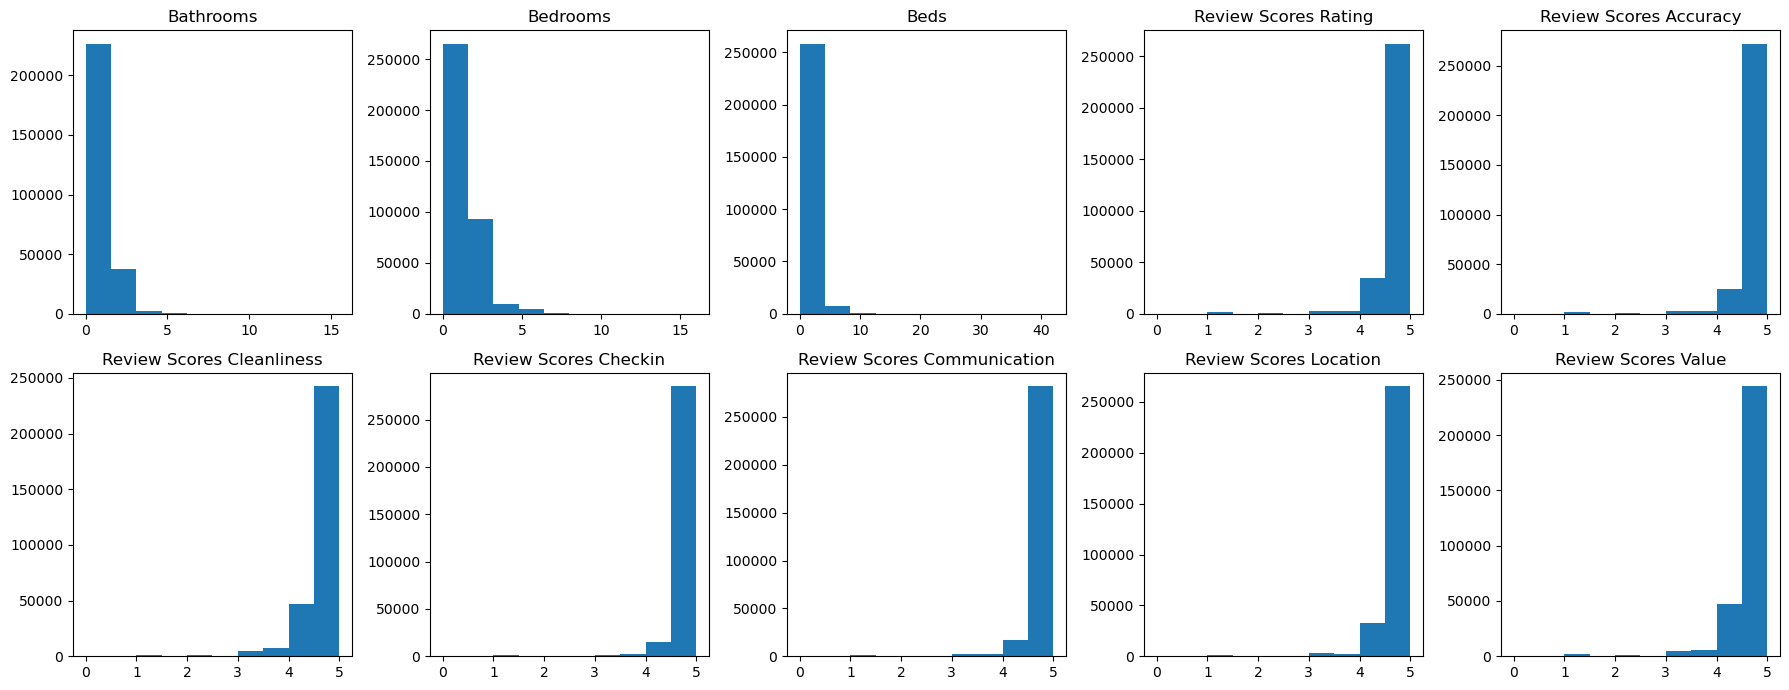

In [14]:
cols = [
    'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col].dropna())
    axes[i].set_title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()

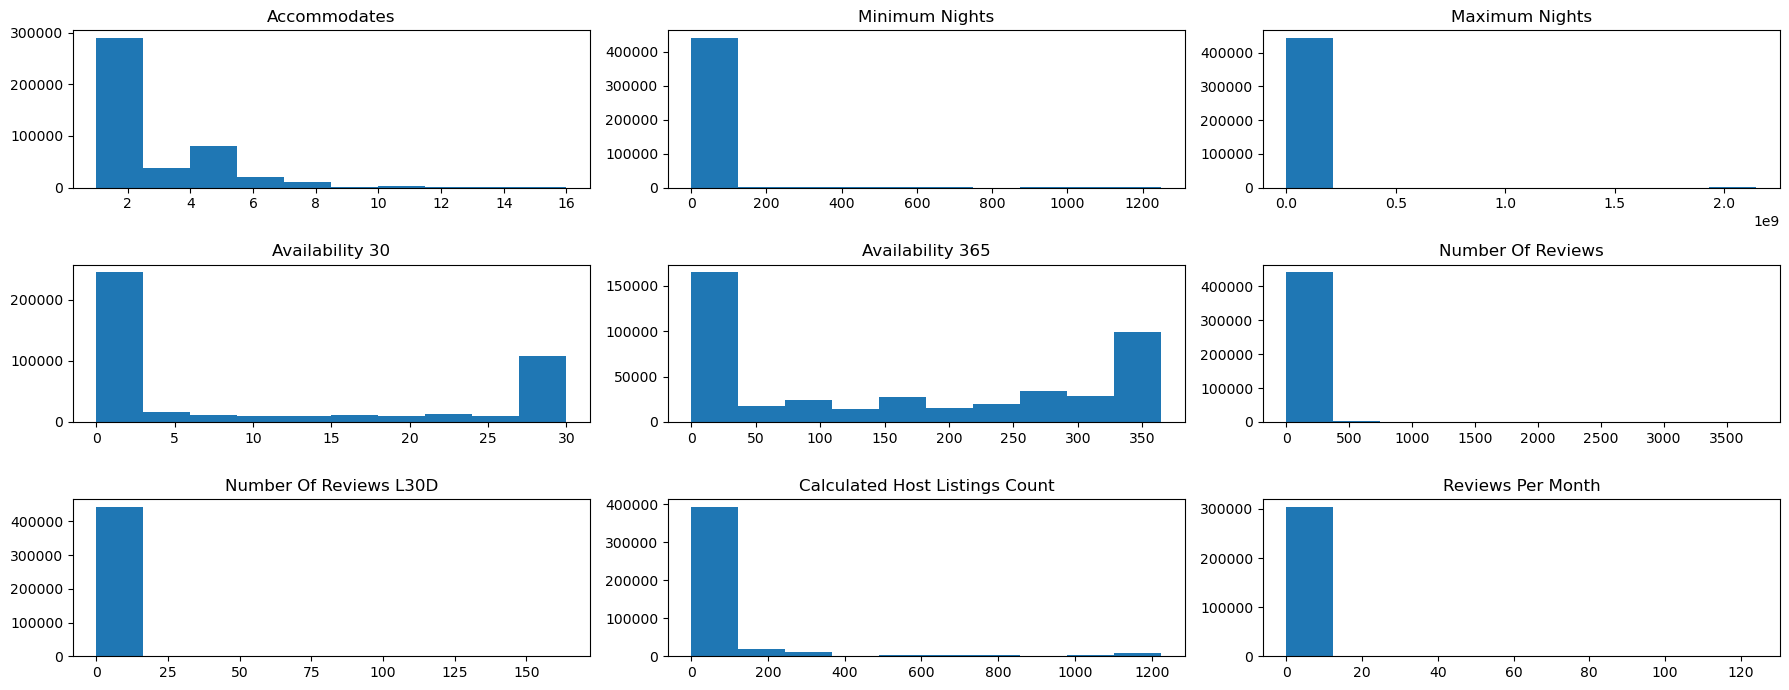

In [15]:
cols = [
   'accommodates', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_365', 'number_of_reviews',
       'number_of_reviews_l30d', 'calculated_host_listings_count', 'reviews_per_month'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 7))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col].dropna())
    axes[i].set_title(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()

### Section 2
#### Mechanical cleaning of the data (no data leakage)

In [16]:
df3=df2=df.select_dtypes(exclude=['float64', 'int']) # note: name is ambiguous
df3.info() # features that needs to be cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443898 entries, 0 to 443897
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   last_scraped            443898 non-null  object
 1   host_response_time      259303 non-null  object
 2   host_response_rate      259303 non-null  object
 3   host_acceptance_rate    265377 non-null  object
 4   host_is_superhost       438729 non-null  object
 5   host_has_profile_pic    441460 non-null  object
 6   host_identity_verified  441460 non-null  object
 7   neighbourhood_cleansed  443898 non-null  object
 8   property_type           443898 non-null  object
 9   room_type               443898 non-null  object
 10  amenities               443898 non-null  object
 11  price                   265091 non-null  object
 12  has_availability        377507 non-null  object
 13  instant_bookable        443898 non-null  object
dtypes: object(14)
memory usage: 47.4+ MB

In [17]:
df3.head()

,last_scraped,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,price,has_availability,instant_bookable
0,2025-01-03,within a day,100%,NaN,f,t,t,Hell's Kitchen,Private room in rental unit,Private room,"[""Hangers"", ""Wifi"", ""Smoke alarm"", ""Carbon mon...",$139.00,t,f
1,2025-01-03,within a few hours,100%,60%,f,t,t,Sunnyside,Private room in condo,Private room,"[""Hangers"", ""Smoke alarm"", ""Hair dryer"", ""Clot...",$78.00,t,f
2,2025-01-03,NaN,NaN,NaN,f,t,t,Bedford-Stuyvesant,Entire townhouse,Entire home/apt,"[""Hangers"", ""Coffee maker"", ""Smoke alarm"", ""Fi...",NaN,t,f
3,2025-01-03,within a day,100%,100%,f,t,t,Lower East Side,Entire loft,Entire home/apt,"[""Hangers"", ""Coffee maker"", ""Smoke alarm"", ""Ha...",$750.00,t,f
4,2025-01-03,within a day,67%,33%,f,t,t,Carroll Gardens,Private room in townhouse,Private room,"[""Hangers"", ""Coffee maker"", ""Smoke alarm"", ""TV...",$185.00,t,f


### Here we can see 4 distinct types: 
 - last_scraped should be in the datetime format
 - 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability','instant_bookable' are booleans so 't' and 'f' should be replaced by 1 and 0 respectively
 - 'host_response_rate', 'host_acceptance_rate', and 'price' are strings that should be stripped of extra characters ('%' and '$') and then cast ast numeric types
 - other string types that currently cannot be handled at this stage to avoid data leakage (e.g. OHE)

In [18]:
# casting to datetime
df['last_scraped'] = pd.to_datetime(df['last_scraped'], format='%Y-%m-%d')
df.head()

,id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,39572,2025-01-03,169927,within a day,100%,NaN,f,t,t,Hell's Kitchen,...,4.86,4.93,4.83,4.98,5.00,4.98,4.86,f,2,0.25
1,39593,2025-01-03,110506,within a few hours,100%,60%,f,t,t,Sunnyside,...,4.93,4.89,4.89,4.96,4.96,4.79,4.93,f,1,0.20
2,39704,2025-01-03,170510,NaN,NaN,NaN,f,t,t,Bedford-Stuyvesant,...,4.71,4.86,4.82,4.89,4.92,4.38,4.72,f,2,1.93
3,42300,2025-01-03,184755,within a day,100%,100%,f,t,t,Lower East Side,...,4.80,4.72,4.69,4.85,4.87,4.57,4.62,f,1,0.40
4,42729,2025-01-03,11481,within a day,67%,33%,f,t,t,Carroll Gardens,...,4.66,4.78,4.81,4.71,4.73,4.58,4.64,f,4,1.26


In [19]:
# just mapping f and t to 1 and 0 
cols = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'has_availability',
    'instant_bookable'
]

df[cols] = df[cols].replace({'f': 0, 't': 1})

In [20]:
# stripping of '%' and '$' and then casting as numeric types
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%')
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [21]:
df.info() # final check of results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443898 entries, 0 to 443897
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              443898 non-null  int64         
 1   last_scraped                    443898 non-null  datetime64[ns]
 2   host_id                         443898 non-null  int64         
 3   host_response_time              259303 non-null  object        
 4   host_response_rate              259303 non-null  float64       
 5   host_acceptance_rate            265377 non-null  float64       
 6   host_is_superhost               438729 non-null  float64       
 7   host_has_profile_pic            441460 non-null  float64       
 8   host_identity_verified          441460 non-null  float64       
 9   neighbourhood_cleansed          443898 non-null  object        
 10  property_type                   443898 non-null  object 

In [22]:
df.head()

,id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,39572,2025-01-03,169927,within a day,100.0,NaN,0.0,1.0,1.0,Hell's Kitchen,...,4.86,4.93,4.83,4.98,5.00,4.98,4.86,0,2,0.25
1,39593,2025-01-03,110506,within a few hours,100.0,60.0,0.0,1.0,1.0,Sunnyside,...,4.93,4.89,4.89,4.96,4.96,4.79,4.93,0,1,0.20
2,39704,2025-01-03,170510,NaN,NaN,NaN,0.0,1.0,1.0,Bedford-Stuyvesant,...,4.71,4.86,4.82,4.89,4.92,4.38,4.72,0,2,1.93
3,42300,2025-01-03,184755,within a day,100.0,100.0,0.0,1.0,1.0,Lower East Side,...,4.80,4.72,4.69,4.85,4.87,4.57,4.62,0,1,0.40
4,42729,2025-01-03,11481,within a day,67.0,33.0,0.0,1.0,1.0,Carroll Gardens,...,4.66,4.78,4.81,4.71,4.73,4.58,4.64,0,4,1.26


TODO: moze neko od ovih ociscenih features da napravi boxplot i histogram, ja sam za price (ill make them all nicer later)

<Axes: xlabel='price'>

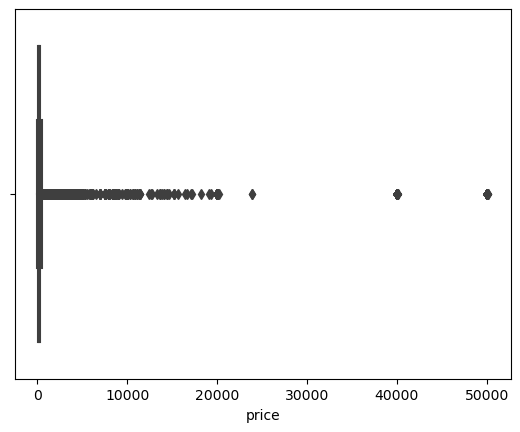

In [23]:
#First look Part 2

sns.boxplot(x=df['price'])

<Axes: xlabel='price', ylabel='Count'>

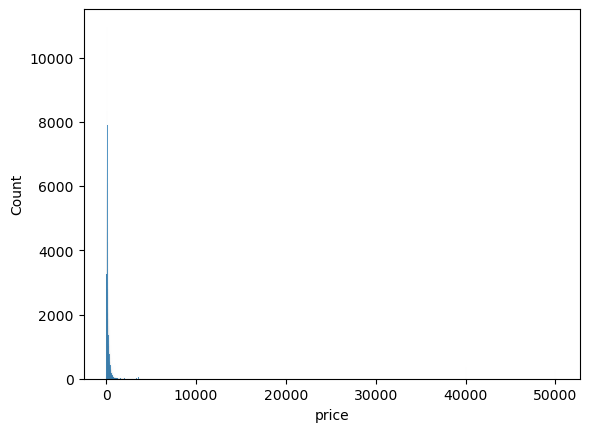

In [24]:
sns.histplot(x=df['price'])

### Section 3
#### Dropping rows according to price

In [25]:
df = df.dropna(subset=['price'])

In [26]:
df.shape

(265091, 35)

In [27]:
df.info() # there are still nulls present which will be dealt with at a later stage to avoid data leakage.

<class 'pandas.core.frame.DataFrame'>
Index: 265091 entries, 0 to 443897
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              265091 non-null  int64         
 1   last_scraped                    265091 non-null  datetime64[ns]
 2   host_id                         265091 non-null  int64         
 3   host_response_time              220339 non-null  object        
 4   host_response_rate              220339 non-null  float64       
 5   host_acceptance_rate            221909 non-null  float64       
 6   host_is_superhost               260883 non-null  float64       
 7   host_has_profile_pic            263002 non-null  float64       
 8   host_identity_verified          263002 non-null  float64       
 9   neighbourhood_cleansed          265091 non-null  object        
 10  property_type                   265091 non-null  object      

### Section 4
#### Splitting df according to the id to avoid data leakage

In [136]:
splitter = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

train_idx, test_idx = next(splitter.split(df, groups=df['id']))

df_train = df.iloc[train_idx]
df_test = df.iloc[test_idx]

## Data Preprocessing   Part B - Esma

Preparing Clean Copies of Train/Test Sets

In [137]:
df_train = df_train.copy()
df_test = df_test.copy()

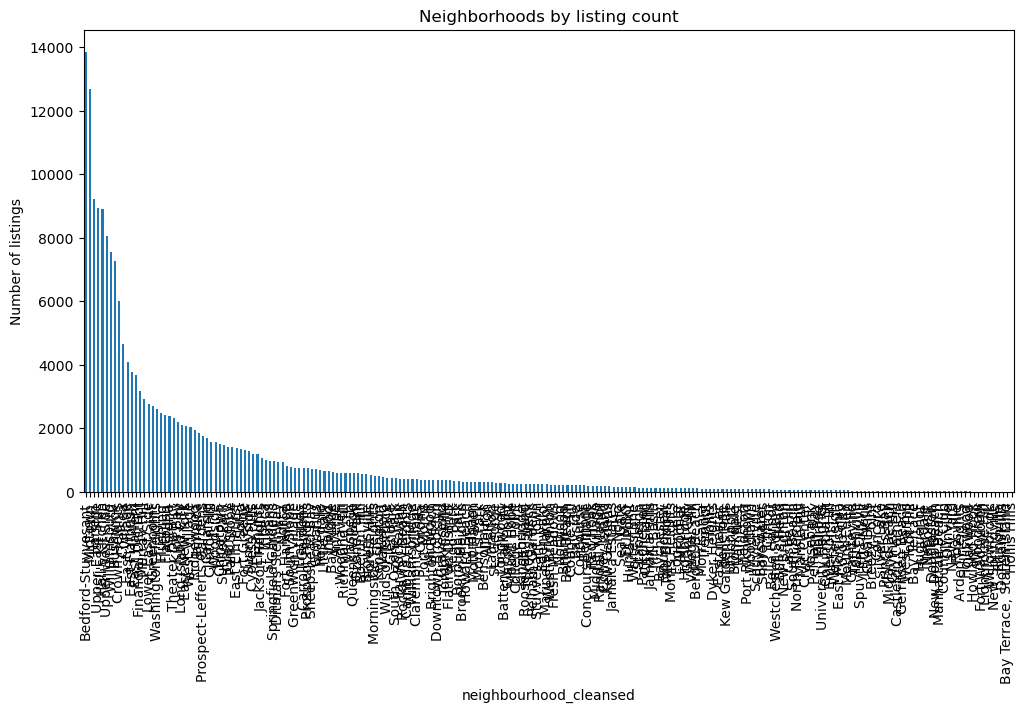

In [138]:
value_counts = df_train['neighbourhood_cleansed'].value_counts()
value_counts.plot(kind='bar', figsize=(12,6))
plt.ylabel("Number of listings")
plt.title("Neighborhoods by listing count")
plt.show()


In [139]:
threshold = 500  # minimum number of listings per neighborhood
value_counts = df_train['neighbourhood_cleansed'].value_counts()
rare_neighs = value_counts[value_counts < threshold].index

# Replace rare neighborhoods with "Other"
df_train['neighbourhood_cleaned'] = df_train['neighbourhood_cleansed'].replace(rare_neighs, 'Other')
df_test['neighbourhood_cleaned']  = df_test['neighbourhood_cleansed'].replace(rare_neighs, 'Other')
df_train=df_train.drop(columns=['neighbourhood_cleansed'])
df_test=df_test.drop(columns=['neighbourhood_cleansed'])
df_train['neighbourhood_cleaned'].value_counts()

neighbourhood_cleaned
Other                  23579
Bedford-Stuyvesant     13858
Midtown                12684
Harlem                  9223
Upper East Side         8951
                       ...  
Ozone Park               583
Boerum Hill              553
Brownsville              553
Forest Hills             535
Morningside Heights      510
Name: count, Length: 71, dtype: int64

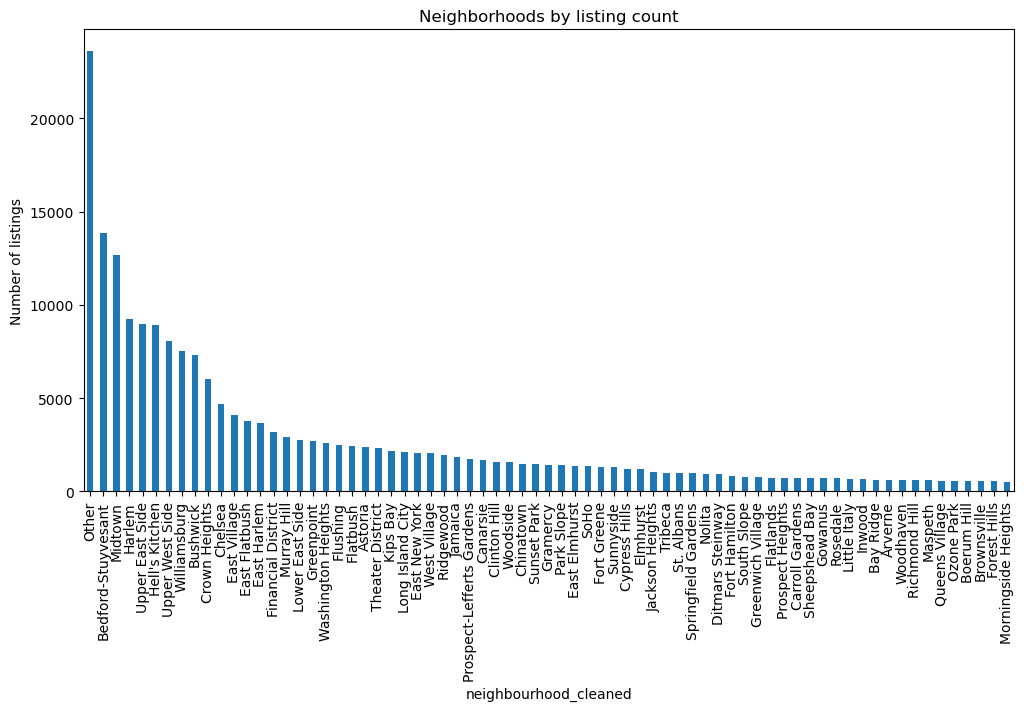

In [140]:
value_counts = df_train['neighbourhood_cleaned'].value_counts()
value_counts.plot(kind='bar', figsize=(12,6))
plt.ylabel("Number of listings")
plt.title("Neighborhoods by listing count")
plt.show()

In [141]:
X_train = df_train.drop(columns=['price'], axis=1)
y_train = df_train['price']

X_test = df_test.drop(columns=['price'], axis=1)
y_test = df_test['price']

In [142]:
X_train.head()

,id,last_scraped,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,property_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,neighbourhood_cleaned
0,39572,2025-01-03,169927,within a day,100.0,NaN,0.0,1.0,1.0,Private room in rental unit,...,4.93,4.83,4.98,5.00,4.98,4.86,0,2,0.25,Hell's Kitchen
1,39593,2025-01-03,110506,within a few hours,100.0,60.0,0.0,1.0,1.0,Private room in condo,...,4.89,4.89,4.96,4.96,4.79,4.93,0,1,0.20,Sunnyside
3,42300,2025-01-03,184755,within a day,100.0,100.0,0.0,1.0,1.0,Entire loft,...,4.72,4.69,4.85,4.87,4.57,4.62,0,1,0.40,Lower East Side
4,42729,2025-01-03,11481,within a day,67.0,33.0,0.0,1.0,1.0,Private room in townhouse,...,4.78,4.81,4.71,4.73,4.58,4.64,0,4,1.26,Carroll Gardens
5,43105,2025-01-03,188082,within a day,100.0,67.0,0.0,1.0,1.0,Entire rental unit,...,5.00,5.00,4.75,5.00,5.00,5.00,0,1,0.04,Midtown


#### Identifying Numeric, Categorical, and Datetime Columns

In [143]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist() #TODO: Seperate Visualy, maybe table
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns.tolist()

numeric_cols, categorical_cols, datetime_cols

(['id',
  'host_id',
  'host_response_rate',
  'host_acceptance_rate',
  'host_is_superhost',
  'host_has_profile_pic',
  'host_identity_verified',
  'accommodates',
  'bathrooms',
  'bedrooms',
  'beds',
  'minimum_nights',
  'maximum_nights',
  'has_availability',
  'availability_30',
  'availability_365',
  'number_of_reviews',
  'number_of_reviews_l30d',
  'review_scores_rating',
  'review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value',
  'instant_bookable',
  'calculated_host_listings_count',
  'reviews_per_month'],
 ['host_response_time',
  'property_type',
  'room_type',
  'amenities',
  'neighbourhood_cleaned'],
 ['last_scraped'])

In [144]:
categorical_cols.remove('amenities')  # Removing this column to avoid high cardinality issues since this feature will be dealt with differently

In [145]:
# Null counts for numeric columns
X_train[numeric_cols].isna().sum().sort_values(ascending=False)

review_scores_accuracy            60017
review_scores_cleanliness         60017
review_scores_checkin             60017
review_scores_communication       60017
review_scores_location            60017
review_scores_value               60017
reviews_per_month                 60002
review_scores_rating              60002
host_response_rate                33546
host_acceptance_rate              32191
host_is_superhost                  3127
has_availability                   2053
host_identity_verified             1550
host_has_profile_pic               1550
beds                                623
bedrooms                            590
bathrooms                            61
calculated_host_listings_count        0
instant_bookable                      0
id                                    0
number_of_reviews_l30d                0
number_of_reviews                     0
availability_365                      0
host_id                               0
maximum_nights                        0


In [146]:
# null values in %
(X_train[numeric_cols].isna().mean() * 100).sort_values(ascending=False)

review_scores_accuracy            30.194194
review_scores_cleanliness         30.194194
review_scores_checkin             30.194194
review_scores_communication       30.194194
review_scores_location            30.194194
review_scores_value               30.194194
reviews_per_month                 30.186648
review_scores_rating              30.186648
host_response_rate                16.876792
host_acceptance_rate              16.195100
host_is_superhost                  1.573175
has_availability                   1.032852
host_identity_verified             0.779796
host_has_profile_pic               0.779796
beds                               0.313428
bedrooms                           0.296825
bathrooms                          0.030689
calculated_host_listings_count     0.000000
instant_bookable                   0.000000
id                                 0.000000
number_of_reviews_l30d             0.000000
number_of_reviews                  0.000000
availability_365                

In [147]:
# Numeric columns have missing values mostly in the review_scores features (~30%),
# which is normal for listings without reviews. Since these features still carry
# useful information, we keep all numeric columns and handle missing values with median imputation,
# a robust choice for Airbnb data that is typically skewed.

In [148]:
numeric_imputer = SimpleImputer(strategy='median')


#We used median imputation because it is the most robust choice for our numeric features.
#Skewness in Airbnb data (reviews, ratings, availability) is very high so mean will be distorted.
# mode is not meaningful for continuous variables, and dropping rows would remove too much
# Useful information. Median preserves the structure of the data without losing signal.

#### Median Imputation + Standard Scaling

In [149]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#### Mode Imputation + One-Hot Encoding

In [150]:

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [151]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='drop'
)

#### Fitting Preprocessing Pipelines on Training Data (Avoid Leakage)

In [152]:
# Fit only on train (IMPORTANT)
preprocessor.fit(X_train)

# Transform both
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test) 

In [153]:
# Handling missing values in numerical columns:
# We applied median imputation because it is robust to outliers and works well
# for skewed Airbnb features (e.g., reviews, ratings, availability).
# The imputer was fitted ONLY on the training set to avoid data leakage,
# and then the same transformation was applied to the test set.
# After preprocessing, both X_train and X_test contain no missing numerical values.



#### Checking Missing Values in Categorical Columns

In [154]:
if hasattr(X_train, "toarray"):
    X_dense = X_train.toarray()
else:
    X_dense = X_train

print("Missing values in X_train after preprocessing:", np.isnan(X_dense).sum())


Missing values in X_train after preprocessing: 0


#### Validating One-Hot Encoding Output

In [155]:
try:
    feature_names = preprocessor.get_feature_names_out()
    print("Number of features after preprocessing:", len(feature_names))
except:
    print("Cannot extract feature names due to sklearn version.")

Number of features after preprocessing: 171


In [156]:
# Note: The large number of encoded categorical features (~167k) comes mainly from the
# 'amenities' column, since each listing has a unique combination of amenities.
# This is expected at this stage. Feature Engineering will later convert amenities
# into a structured set of binary features to reduce dimensionality.

In [53]:
print("X_train shape:", X_train.shape)
print("Number of final features:", X_train.shape[1])

X_train shape: (198770, 167246)
Number of final features: 167246


In [54]:
print("Any NaNs in X_train?", np.isnan(X_train.data).any())
print("Any NaNs in X_test?", np.isnan(X_test.data).any())

Any NaNs in X_train? False
Any NaNs in X_test? False


# Section C — Feature Engineering

____________________________________________________________________________
# SECTION 5: FULL EDA (DEEPER ANALYSIS)
# Primary: Amina (C) | Contributors: Asja (A), Esma (B)
____________________________________________________________________________


In [55]:
# 5.1 Overview of Training Data
print("\nTraining Data")
print(f"Training set shape: {df_train.shape}")
print(f"\nColumn types distribution:")
print(df_train.dtypes.value_counts())


Training Data
Training set shape: (198770, 35)

Column types distribution:
float64           18
int64             11
object             5
datetime64[ns]     1
Name: count, dtype: int64



--- Price Distribution Analysis ---
Price statistics:
count    198770.000000
mean        337.009383
std        2301.143784
min           3.000000
25%          86.000000
50%         147.000000
75%         250.000000
max       50184.000000
Name: price, dtype: float64

Price skewness: 18.99
Price kurtosis: 371.57


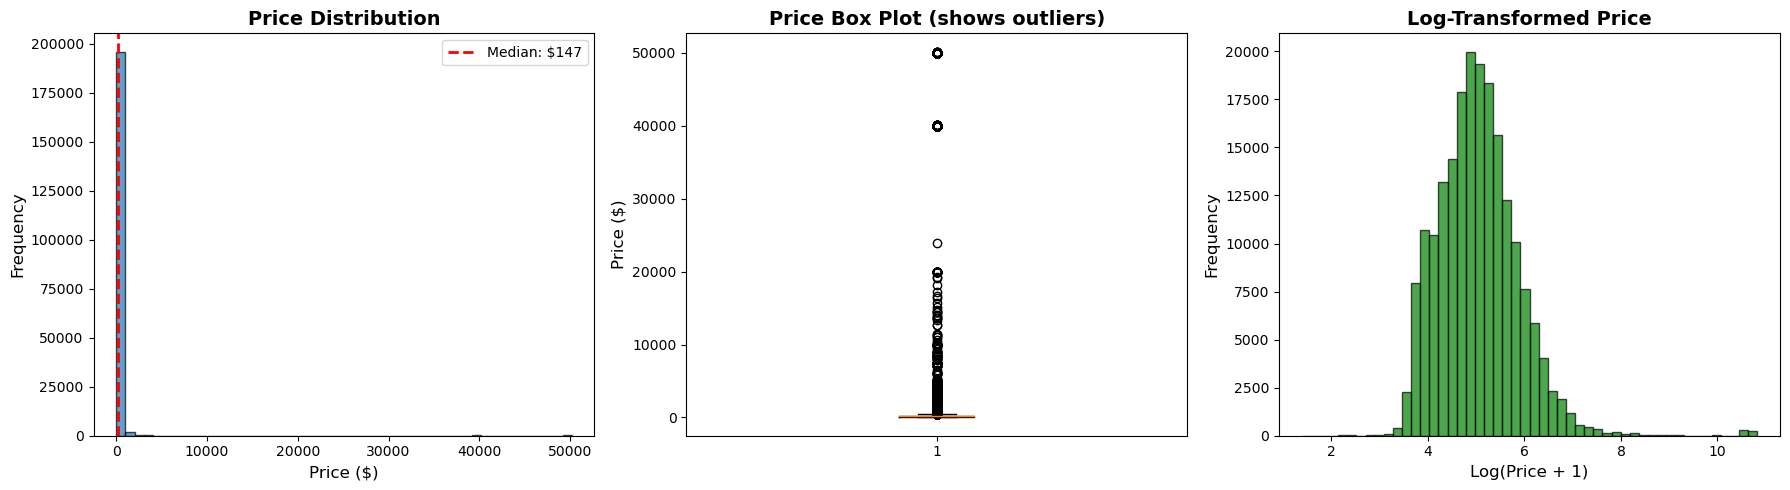

In [56]:
# 5.2 Target Variable (Price) Distribution - DETAILED
print("\n--- Price Distribution Analysis ---")
print(f"Price statistics:")
print(df_train['price'].describe())
print(f"\nPrice skewness: {df_train['price'].skew():.2f}")
print(f"Price kurtosis: {df_train['price'].kurtosis():.2f}")

# Visualize price distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df_train['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].axvline(df_train['price'].median(), color='red', linestyle='--', 
                linewidth=2, label=f'Median: ${df_train["price"].median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df_train['price'], vert=True)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].set_title('Price Box Plot (shows outliers)', fontsize=14, fontweight='bold')

# Log-transformed price (to see if it's more normal)
axes[2].hist(np.log1p(df_train['price']), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_xlabel('Log(Price + 1)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Log-Transformed Price', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



Top 10 features correlated with price:
price                   1.000000
instant_bookable        0.109697
accommodates            0.089921
host_id                 0.080737
maximum_nights          0.070295
id                      0.063147
bathrooms               0.060605
bedrooms                0.039003
host_acceptance_rate    0.033557
host_response_rate      0.024235
Name: price, dtype: float64


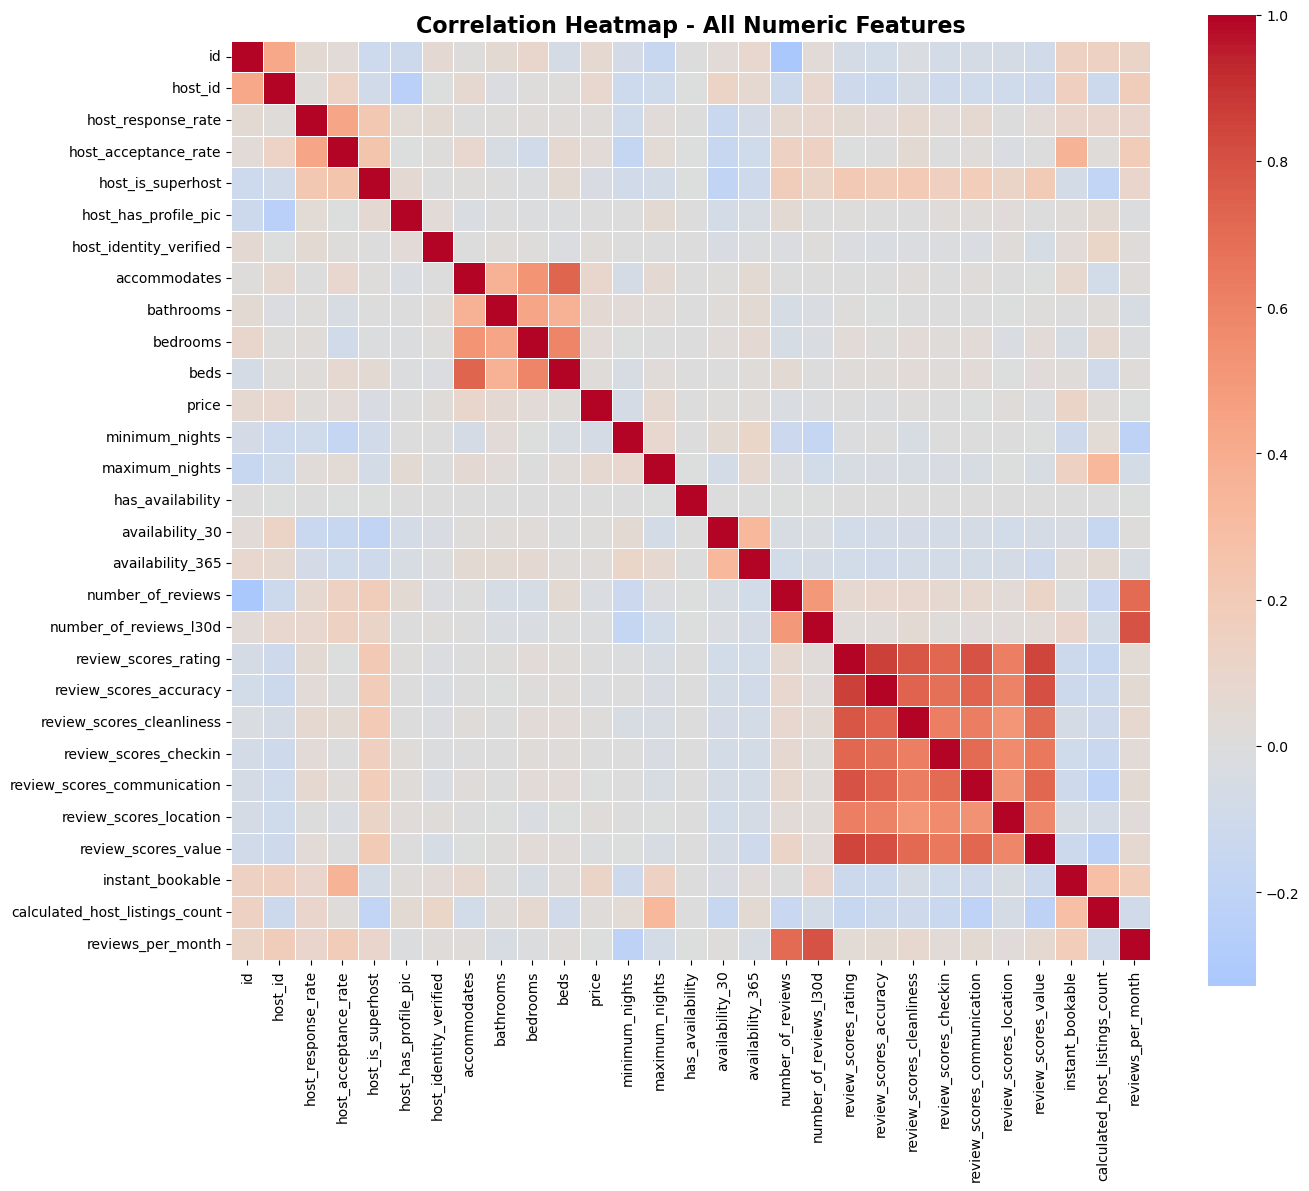

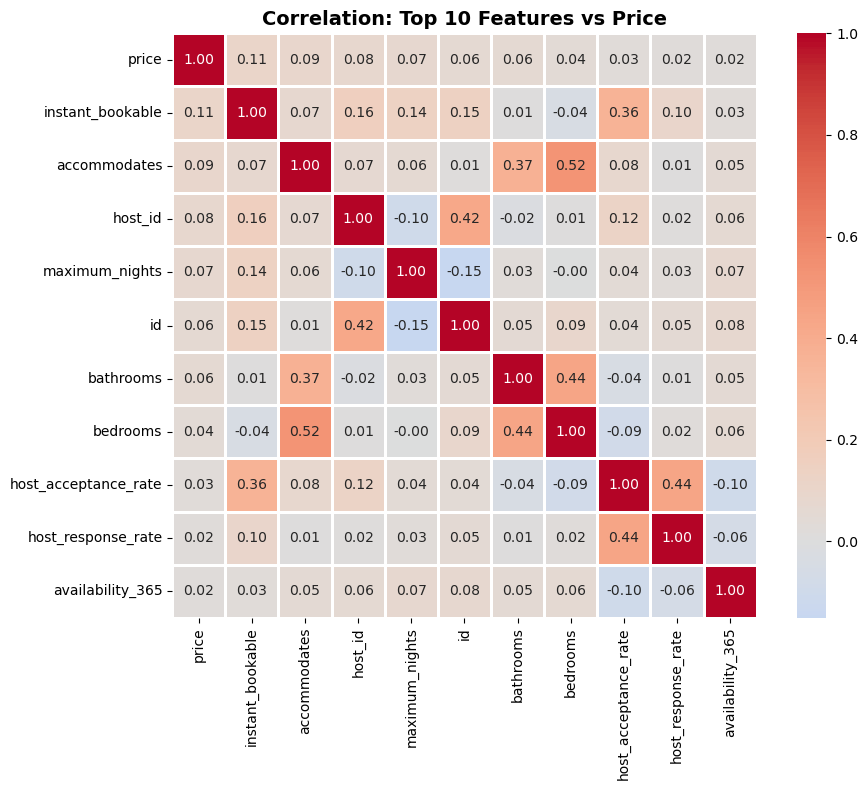

In [57]:
# 5.3 Correlation Analysis - Numeric Features
# Select numeric columns
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_train[numeric_cols].corr()

# Find features most correlated with price
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("\nTop 10 features correlated with price:")
print(price_correlations.head(10))

# Visualize correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap - All Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Focus on top correlated features with price
top_features = price_correlations.head(11).index  # Top 10 + price itself
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[top_features].corr(), annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation: Top 10 Features vs Price', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

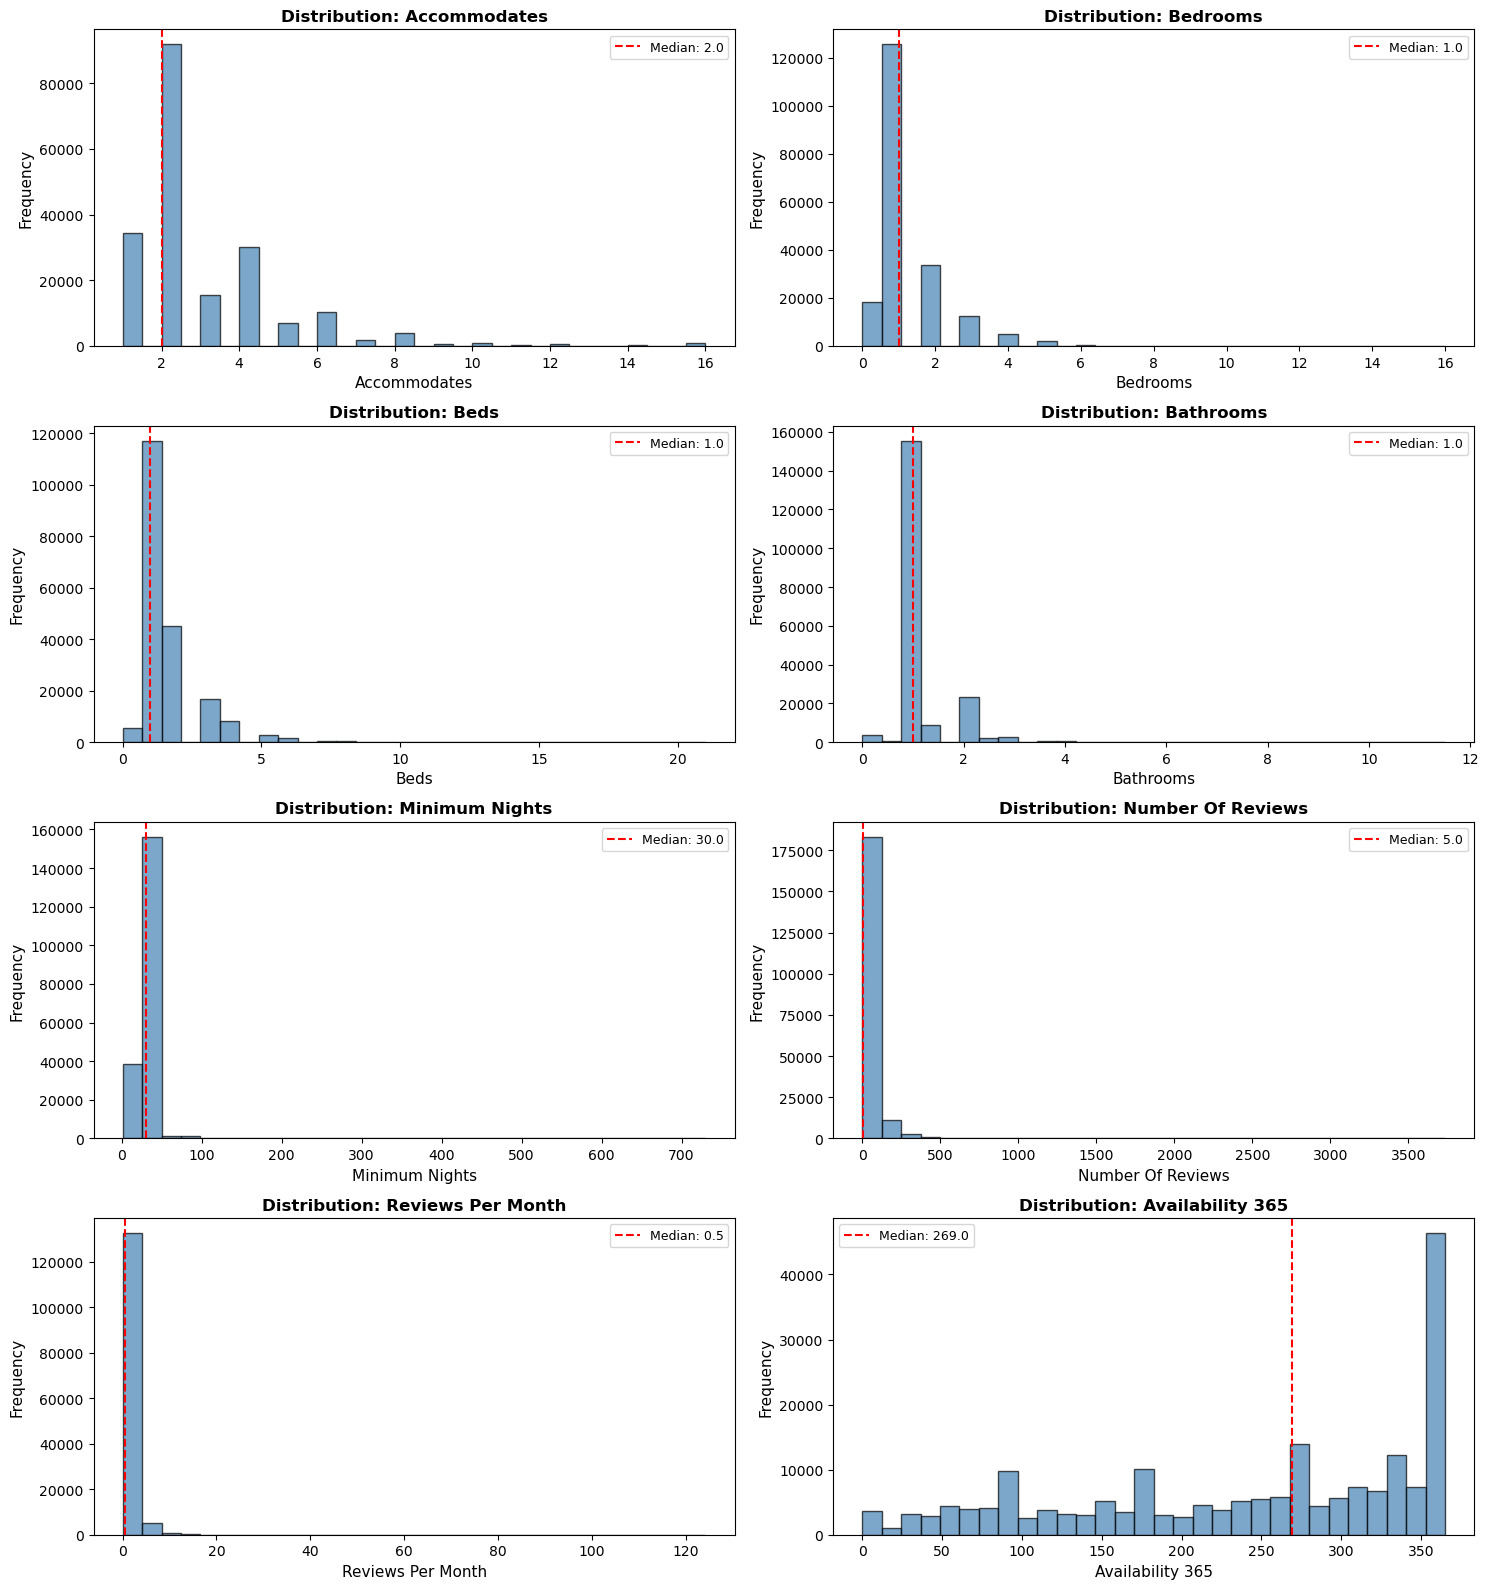

In [58]:
# 5.4 Feature Distributions - Visual Analysis
# Key numeric features to analyze
key_features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 
                'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'availability_365']

fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(key_features):
    if col in df_train.columns:
        # Remove NaN for plotting
        data = df_train[col].dropna()
        
        axes[i].hist(data, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=11)
        axes[i].set_ylabel('Frequency', fontsize=11)
        axes[i].set_title(f'Distribution: {col.replace("_", " ").title()}', 
                         fontsize=12, fontweight='bold')
        
        # Add statistics
        axes[i].axvline(data.median(), color='red', linestyle='--', 
                       linewidth=1.5, label=f'Median: {data.median():.1f}')
        axes[i].legend(fontsize=9)

plt.tight_layout()
plt.show()



ROOM_TYPE - Price Statistics:
                    count         mean           std   min    25%    50%  \
room_type                                                                  
Entire home/apt  111599.0   278.893073    466.920257   8.0  135.0  199.0   
Hotel room         2615.0  8630.636711  17151.752807   8.0  215.0  424.0   
Private room      83209.0   157.324208    955.951015   3.0   56.0   84.0   
Shared room        1347.0   150.899777    376.461585  13.0   38.0   68.0   

                   75%      max  
room_type                        
Entire home/apt  313.0  50000.0  
Hotel room       999.0  50184.0  
Private room     136.0  50041.0  
Shared room      150.0   7000.0  


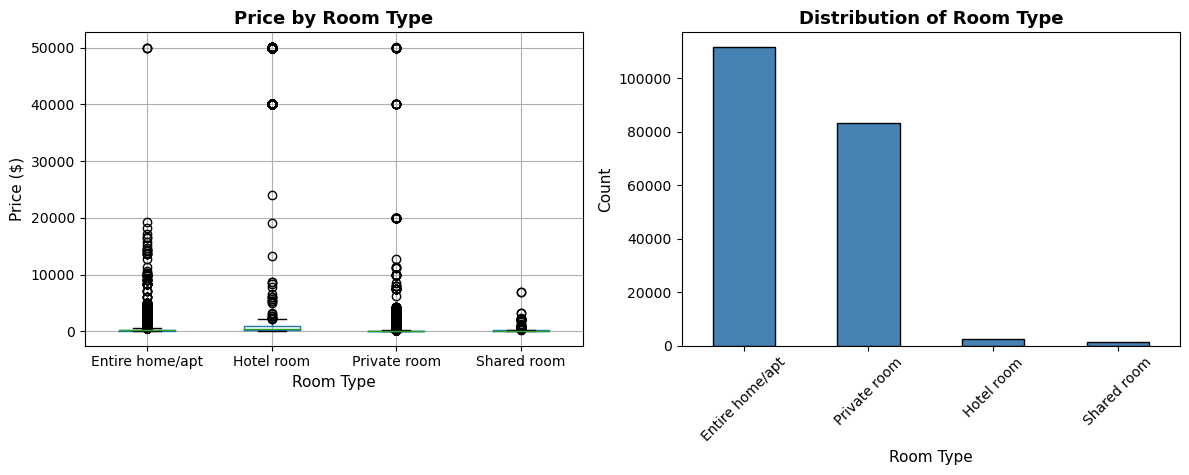

In [59]:
# 5.5 Categorical Features vs Price
# Important categorical features
cat_features = ['room_type', 'neighbourhood_group']

for feature in cat_features:
    if feature in df_train.columns:
        print(f"\n{feature.upper()} - Price Statistics:")
        print(df_train.groupby(feature)['price'].describe())
        
        # Visualize
        plt.figure(figsize=(12, 5))
        
        # Box plot
        plt.subplot(1, 2, 1)
        df_train.boxplot(column='price', by=feature, ax=plt.gca())
        plt.title(f'Price by {feature.replace("_", " ").title()}', fontsize=13, fontweight='bold')
        plt.suptitle('')  # Remove default title
        plt.xlabel(feature.replace('_', ' ').title(), fontsize=11)
        plt.ylabel('Price ($)', fontsize=11)
        
        # Count plot
        plt.subplot(1, 2, 2)
        df_train[feature].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
        plt.title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=13, fontweight='bold')
        plt.xlabel(feature.replace('_', ' ').title(), fontsize=11)
        plt.ylabel('Count', fontsize=11)
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

In [60]:
# 5.6 Outlier Detection and Analysis

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers in key features
outlier_features = ['price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights']

for feature in outlier_features:
    if feature in df_train.columns:
        outliers, lower, upper = detect_outliers_iqr(df_train, feature)
        pct_outliers = (len(outliers) / len(df_train)) * 100
        
        print(f"\n{feature.upper()}:")
        print(f"  Lower bound: {lower:.2f}")
        print(f"  Upper bound: {upper:.2f}")
        print(f"  Number of outliers: {len(outliers)} ({pct_outliers:.2f}%)")
        if len(outliers) > 0:
            print(f"  Outlier range: {outliers[feature].min():.2f} to {outliers[feature].max():.2f}")


PRICE:
  Lower bound: -160.00
  Upper bound: 496.00
  Number of outliers: 14780 (7.44%)
  Outlier range: 497.00 to 50184.00

ACCOMMODATES:
  Lower bound: -1.00
  Upper bound: 7.00
  Number of outliers: 7485 (3.77%)
  Outlier range: 8.00 to 16.00

BEDROOMS:
  Lower bound: -0.50
  Upper bound: 3.50
  Number of outliers: 7696 (3.87%)
  Outlier range: 4.00 to 16.00

BEDS:
  Lower bound: -0.50
  Upper bound: 3.50
  Number of outliers: 13788 (6.94%)
  Outlier range: 4.00 to 21.00

MINIMUM_NIGHTS:
  Lower bound: 30.00
  Upper bound: 30.00
  Number of outliers: 53914 (27.12%)
  Outlier range: 1.00 to 730.00



Features with missing values:
                             Missing_Count  Percentage
review_scores_value                  60017   30.194194
review_scores_location               60017   30.194194
review_scores_communication          60017   30.194194
review_scores_checkin                60017   30.194194
review_scores_cleanliness            60017   30.194194
review_scores_accuracy               60017   30.194194
reviews_per_month                    60002   30.186648
review_scores_rating                 60002   30.186648
host_response_rate                   33546   16.876792
host_response_time                   33546   16.876792
host_acceptance_rate                 32191   16.195100
host_is_superhost                     3127    1.573175
has_availability                      2053    1.032852
host_identity_verified                1550    0.779796
host_has_profile_pic                  1550    0.779796
beds                                   623    0.313428
bedrooms                          

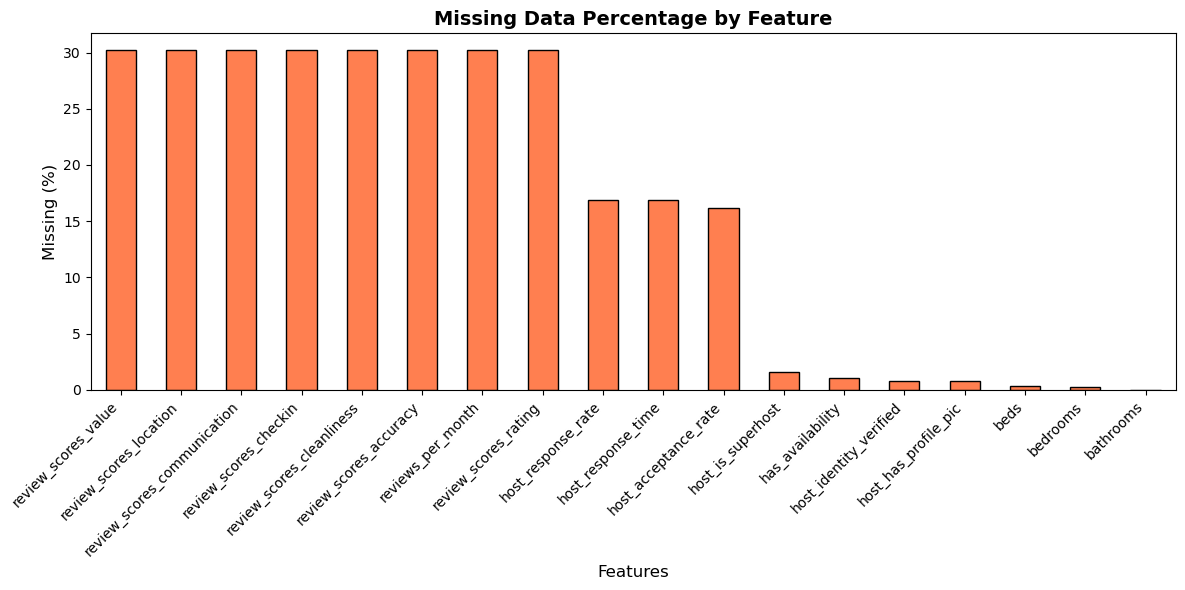

In [61]:
# 5.7 Missing Data Patterns (for Esma to use in Section 6)
missing_data = df_train.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    print("\nFeatures with missing values:")
    missing_pct = (missing_data / len(df_train)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_data,
        'Percentage': missing_pct
    })
    print(missing_df)
    
    # Visualize missing data
    plt.figure(figsize=(12, 6))
    missing_df['Percentage'].plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Missing Data Percentage by Feature', fontsize=14, fontweight='bold')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Missing (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in training data!")

In [62]:
# 5.8 Key Insights Summary
print(f"1. Price is highly skewed (skewness: {df_train['price'].skew():.2f})")
print(f"2. Price range: ${df_train['price'].min():.0f} to ${df_train['price'].max():.0f}")
print(f"3. Median price: ${df_train['price'].median():.0f}")
print(f"4. Features most correlated with price:")
for i, (feat, corr) in enumerate(price_correlations.head(6).items(), 1):
    if feat != 'price':
        print(f"   {i}. {feat}: {corr:.3f}")
print(f"5. {len(missing_data)} features have missing values")
print("="*80)

1. Price is highly skewed (skewness: 18.99)
2. Price range: $3 to $50184
3. Median price: $147
4. Features most correlated with price:
   2. instant_bookable: 0.110
   3. accommodates: 0.090
   4. host_id: 0.081
   5. maximum_nights: 0.070
   6. id: 0.063
5. 18 features have missing values


______________________________________________________________________________
# SECTION 7: CLUSTERING FOR TARGET CREATION
# Primary: Amina (C) | Contributor: Asja (A)
# Goal: Create 'low', 'medium', 'high' price categories using clustering
______________________________________________________________________________


In [63]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("\n" + "="*80)
print("SECTION 7: CLUSTERING FOR TARGET VARIABLE CREATION")
print("="*80)


SECTION 7: CLUSTERING FOR TARGET VARIABLE CREATION


In [64]:
# 7.1 Prepare Price Data for Clustering

# Extract price from training set (already dropped nulls)
X_price = df_train[['price']].copy()
print(f"Price data shape: {X_price.shape}")
print(f"Price range: ${X_price['price'].min():.2f} to ${X_price['price'].max():.2f}")

# Standardize price for clustering (important for KMeans)
scaler = StandardScaler()
X_price_scaled = scaler.fit_transform(X_price)


Price data shape: (198770, 1)
Price range: $3.00 to $50184.00



Quantile-based distribution:
price_quantile
low       66415
medium    66234
high      66121
Name: count, dtype: int64

Price ranges per bin:
                  min      max        mean  median
price_quantile                                    
low               3.0    103.0   68.535000    68.0
medium          104.0    200.0  148.478938   147.0
high            201.0  50184.0  795.530149   324.0


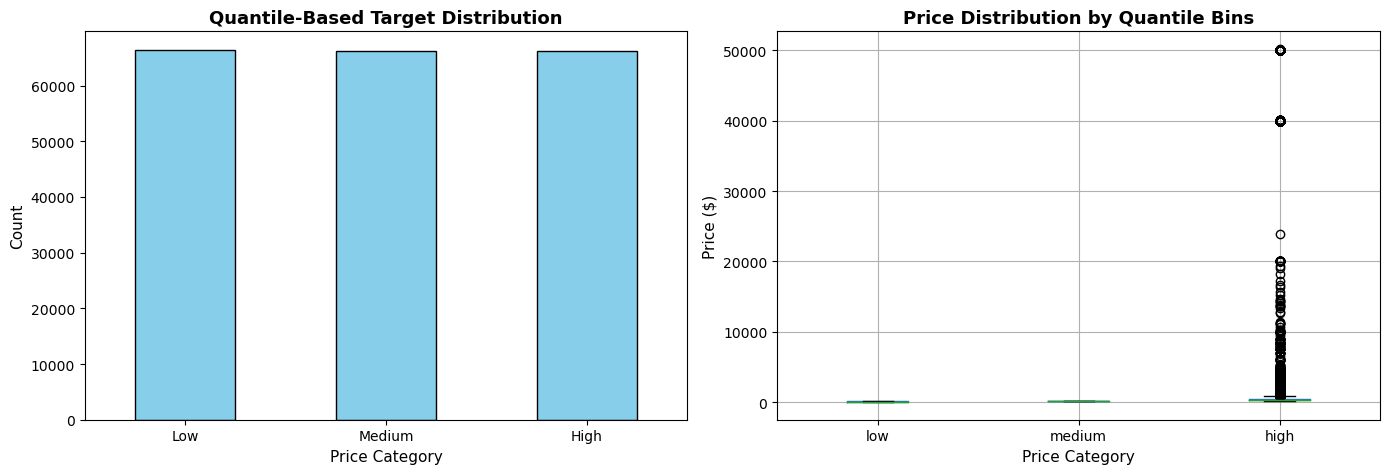

In [65]:
# 7.2 Method 1: Quantile-Based Binning (Baseline)

# Create 3 bins using quantiles (33%, 66%)
df_train['price_quantile'] = pd.qcut(df_train['price'], q=3, labels=['low', 'medium', 'high'])

print("\nQuantile-based distribution:")
print(df_train['price_quantile'].value_counts().sort_index())
print("\nPrice ranges per bin:")
print(df_train.groupby('price_quantile')['price'].agg(['min', 'max', 'mean', 'median']))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
df_train['price_quantile'].value_counts().sort_index().plot(kind='bar', ax=axes[0], 
                                                              color='skyblue', edgecolor='black')
axes[0].set_title('Quantile-Based Target Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Price Category', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)

# Box plot
df_train.boxplot(column='price', by='price_quantile', ax=axes[1])
axes[1].set_title('Price Distribution by Quantile Bins', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Price Category', fontsize=11)
axes[1].set_ylabel('Price ($)', fontsize=11)
plt.suptitle('')
plt.tight_layout()
plt.show()

In [66]:
# 7.3 Method 2: KMeans Clustering

# Try different numbers of clusters (2-5)
inertias = []
silhouette_scores = []
db_scores = []
K_range = range(2, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_price_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_price_scaled, labels))
    db_scores.append(davies_bouldin_score(X_price_scaled, labels))

# Plot metrics
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
axes[0].set_title('Elbow Method', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Clusters', fontsize=11)
axes[0].set_ylabel('Inertia', fontsize=11)
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
axes[1].set_title('Silhouette Score (higher is better)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Clusters', fontsize=11)
axes[1].set_ylabel('Silhouette Score', fontsize=11)
axes[1].grid(True, alpha=0.3)

axes[2].plot(K_range, db_scores, marker='o', linewidth=2, markersize=8, color='red')
axes[2].set_title('Davies-Bouldin Score (lower is better)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Number of Clusters', fontsize=11)
axes[2].set_ylabel('DB Score', fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nClustering Metrics:")
for i, k in enumerate(K_range):
    print(f"K={k}: Silhouette={silhouette_scores[i]:.3f}, Davies-Bouldin={db_scores[i]:.3f}")

# Fit KMeans with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df_train['price_kmeans'] = kmeans_3.fit_predict(X_price_scaled)

# Map cluster numbers to labels (low, medium, high) based on mean price
cluster_means = df_train.groupby('price_kmeans')['price'].mean().sort_values()
label_mapping = {cluster_means.index[0]: 'low', 
                 cluster_means.index[1]: 'medium', 
                 cluster_means.index[2]: 'high'}
df_train['price_kmeans_labeled'] = df_train['price_kmeans'].map(label_mapping)

print("\nKMeans (3 clusters) distribution:")
print(df_train['price_kmeans_labeled'].value_counts().sort_index())
print("\nPrice ranges per KMeans cluster:")
print(df_train.groupby('price_kmeans_labeled')['price'].agg(['min', 'max', 'mean', 'median']))

KeyboardInterrupt: 

In [ ]:
# 7.4 Method 3: Gaussian Mixture Model (GMM)
# Fit GMM with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
df_train['price_gmm'] = gmm.fit_predict(X_price_scaled)

# Map to labels
cluster_means_gmm = df_train.groupby('price_gmm')['price'].mean().sort_values()
label_mapping_gmm = {cluster_means_gmm.index[0]: 'low', 
                     cluster_means_gmm.index[1]: 'medium', 
                     cluster_means_gmm.index[2]: 'high'}
df_train['price_gmm_labeled'] = df_train['price_gmm'].map(label_mapping_gmm)

print("\nGMM (3 components) distribution:")
print(df_train['price_gmm_labeled'].value_counts().sort_index())
print("\nPrice ranges per GMM cluster:")
print(df_train.groupby('price_gmm_labeled')['price'].agg(['min', 'max', 'mean', 'median']))


--- Method 3: Gaussian Mixture Model ---

GMM (3 components) distribution:
price_gmm_labeled
high        2379
low       155743
medium     40648
Name: count, dtype: int64

Price ranges per GMM cluster:
                      min      max          mean  median
price_gmm_labeled                                       
high               1236.0  50184.0  11938.661202  2316.0
low                   3.0    275.0    127.422427   119.0
medium              276.0   1235.0    461.034467   396.0



--- Comparison of All Methods ---


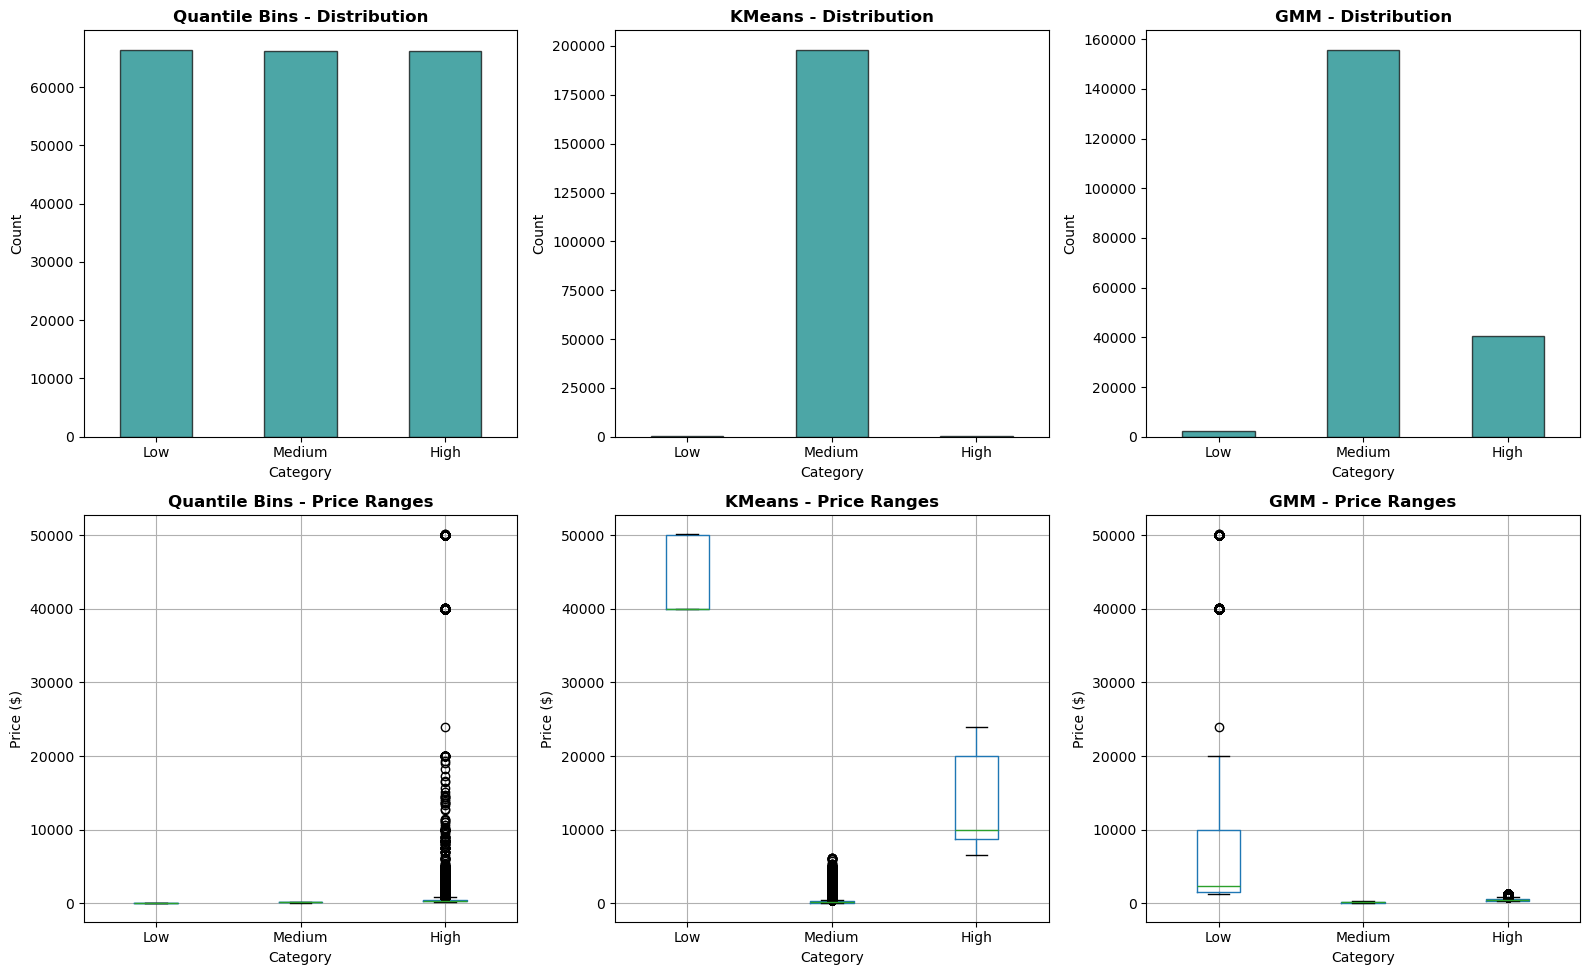

In [ ]:
# 7.5 Compare Methods

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

methods = [
    ('price_quantile', 'Quantile Bins'),
    ('price_kmeans_labeled', 'KMeans'),
    ('price_gmm_labeled', 'GMM')
]

for i, (col, title) in enumerate(methods):
    # Bar chart
    df_train[col].value_counts().sort_index().plot(kind='bar', ax=axes[0, i], 
                                                     color='teal', edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{title} - Distribution', fontsize=12, fontweight='bold')
    axes[0, i].set_xlabel('Category', fontsize=10)
    axes[0, i].set_ylabel('Count', fontsize=10)
    axes[0, i].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)
    
    # Box plot
    df_train.boxplot(column='price', by=col, ax=axes[1, i])
    axes[1, i].set_title(f'{title} - Price Ranges', fontsize=12, fontweight='bold')
    axes[1, i].set_xlabel('Category', fontsize=10)
    axes[1, i].set_ylabel('Price ($)', fontsize=10)
    plt.sca(axes[1, i])
    plt.xticks([1, 2, 3], ['Low', 'Medium', 'High'])

plt.suptitle('')
plt.tight_layout()
plt.show()


In [ ]:
# 7.6 Choose Best Method and Apply to Test Set

# Based on metrics and business logic, let's use KMeans (you can change this)
CHOSEN_METHOD = 'kmeans'  # Options: 'quantile', 'kmeans', 'gmm'

if CHOSEN_METHOD == 'quantile':
    df_train['price_category'] = df_train['price_quantile']
    # Apply to test set
    df_test['price_category'] = pd.qcut(df_test['price'], q=3, labels=['low', 'medium', 'high'])
    print("\n✓ CHOSEN METHOD: Quantile-Based Binning")
    
elif CHOSEN_METHOD == 'kmeans':
    df_train['price_category'] = df_train['price_kmeans_labeled']
    # Apply to test set (transform only, using fitted scaler and model)
    X_test_price_scaled = scaler.transform(df_test[['price']])
    df_test['price_kmeans'] = kmeans_3.predict(X_test_price_scaled)
    df_test['price_category'] = df_test['price_kmeans'].map(label_mapping)
    print("\n✓ CHOSEN METHOD: KMeans Clustering")
    
elif CHOSEN_METHOD == 'gmm':
    df_train['price_category'] = df_train['price_gmm_labeled']
    # Apply to test set
    X_test_price_scaled = scaler.transform(df_test[['price']])
    df_test['price_gmm'] = gmm.predict(X_test_price_scaled)
    df_test['price_category'] = df_test['price_gmm'].map(label_mapping_gmm)
    print("\n✓ CHOSEN METHOD: Gaussian Mixture Model")

print("\nFinal Training Set Target Distribution:")
print(df_train['price_category'].value_counts().sort_index())
print("\nFinal Test Set Target Distribution:")
print(df_test['price_category'].value_counts().sort_index())


--- Final Decision: Choosing Best Method ---

✓ CHOSEN METHOD: KMeans Clustering

Final Training Set Target Distribution:
price_category
high         515
low       198108
medium       147
Name: count, dtype: int64

Final Test Set Target Distribution:
price_category
high        190
low       66084
medium       47
Name: count, dtype: int64


In [ ]:

# 7.7 Save Target Variable Info
print("\nTraining Set - Price Category Statistics:")
print(df_train.groupby('price_category')['price'].describe())
print("\nTest Set - Price Category Statistics:")
print(df_test.groupby('price_category')['price'].describe())

# Drop intermediate columns
df_train = df_train.drop(columns=['price_quantile', 'price_kmeans', 
                                   'price_kmeans_labeled', 'price_gmm', 
                                   'price_gmm_labeled'], errors='ignore')
df_test = df_test.drop(columns=['price_kmeans', 'price_gmm'], errors='ignore')

print("\n" + "="*80)
print("✓ CLUSTERING COMPLETE - Target variable 'price_category' created!")
print("="*80)
print("\nNow ready for Feature Engineering (Section 8 - Asja)")


--- Summary Statistics ---

Training Set - Price Category Statistics:
                   count          mean          std      min      25%  \
price_category                                                          
high               515.0  44334.000000  4961.145566  40000.0  40000.0   
low             198108.0    213.430038   263.208503      3.0     86.0   
medium             147.0  12742.496599  4970.176274   6563.0   8679.0   

                    50%      75%      max  
price_category                             
high            40000.0  50000.0  50184.0  
low               146.0    250.0   6171.0  
medium          10000.0  20000.0  23940.0  

Test Set - Price Category Statistics:
                  count          mean          std      min      25%      50%  \
price_category                                                                  
high              190.0  44107.700000  4933.705401  40000.0  40000.0  40000.0   
low             66084.0    215.480162   271.054720      8.0  